# Fishery Production

Visualizing fishery production in tons by type (capture and aquaculture)

*Author: Rachel Thoms
<br>Created: 18 Aug 2021
<br>Environment: jupyterlab*

## Style

- Vega chart
- Stacked bar chart
- Values - production quantity in metric tons by type (capture and aquaculture)

## Data

- Data: [foo_062_rw0_fishery_production](https://resourcewatch.carto.com/u/wri-rw/dataset/foo_062_rw0_fishery_production_edit)
- Resource Watch: [explore page](https://resourcewatch.org/data/explore/ac9c2f07-9f23-4a33-9958-e02c571ec009)
- Source: [FAO Food Balance Sheets](http://www.fao.org/faostat/en/#data/FBS)

## Preparation

### Vega

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 500
widget_height = 200

## Visualization

### Queries

#### Testing

```gadm.geostore_prod ILIKE 'f4599aaeedacb9e6ddca177a93795e4c'``` used as stand-in for parameterized ```{{{geostore_env}}='{{geostore_id}}'``` in production version

``` sql
SELECT gadm.gid_0, type as variable, year as date, SUM(value) as value FROM foo_062_rw0_fishery_production_edit 
INNER JOIN  gadm36_0 gadm ON iso3_code = gid_0 WHERE (type = 'Capture_quantity' OR type = 'Aquaculture_quantity') AND gadm.geostore_prod ILIKE 'f4599aaeedacb9e6ddca177a93795e4c' 
GROUP BY gid_0, variable, year
ORDER BY date ASC, variable DESC
```

#### Parameterized Version

```sql
SELECT gadm.gid_0, type as variable, year as date, SUM(value) as value FROM foo_062_rw0_fishery_production_edit 
INNER JOIN  gadm36_0 gadm ON iso3_code = gid_0 WHERE (type = 'Capture_quantity' OR type = 'Aquaculture_quantity') AND gadm.{{geostore_env}} ILIKE '{{geostore_id}}' 
GROUP BY gid_0, variable, year
ORDER BY date ASC, variable DESC
```

```sql

```

In [14]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "padding": 5,
  "data": [
    {
      "name": "production",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gadm.gid_0, type as variable, year as date, SUM(value) as value FROM foo_062_rw0_fishery_production_edit  INNER JOIN  gadm36_0 gadm ON iso3_code = gid_0 WHERE (type = 'Capture_quantity' OR type = 'Aquaculture_quantity') AND gadm.{{geostore_env}} ILIKE '{{geostore_id}}' GROUP BY gid_0, variable, year ORDER BY date ASC, variable DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {"type": "stack", "field": "value", "groupby": ["gid_0", "date"]},
        {
          "type": "formula",
          "expr": "split(datum.variable, '_')[0]",
          "as": "variable"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "band",
      "range": "width",
      "domain": {"data": "production", "field": "date"}
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {"data": "production", "field": "y1"}
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": ["#84c0d0", "#005c7e"],
      "domain": ["Aquaculture", "Capture"]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "x",
      "zindex": 1,
      "labelFont": "Arial",
      "labelFontSize": 11,
      "labelOverlap": true,
      "labelBaseline": "middle",
      "tickSize": 5
    },
    {
      "orient": "left",
      "scale": "y",
      "zindex": 1,
      "title": "Production quantity (metric tons)",
      "titleFont": "Arial",
      "titleFontStyle": "normal",
      "labelFont": "Arial",
      "labelBaseline": "middle",
      "labelAlign": "right",
      "labelPadding": 3,
      "grid": true,
      "gridOpacity": 0.2,
      "encode": {
        "labels": {"update": {"text": {"signal": "format(datum.value, '~s')"}}}
      }
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "production"},
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "date"},
          "width": {"scale": "x", "band": 1, "offset": -1},
          "y": {"scale": "y", "field": "y0"},
          "y2": {"scale": "y", "field": "y1"},
          "fill": {"scale": "color", "field": "variable"},
          "fillOpacity": {"value": 1}
          },
        "update": {"fillOpacity": {"value": 1}},
        "hover": {"fillOpacity": {"value": 0.7}}
      }
    }
  ],
  "legends": [
    {"fill": "color", "orient": "right"}
  ],
    "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "variable",
            "property": "Production type",
            "type": "text",
            "format": ""
          },
          {
            "column": "value",
            "property": "Production quantity (metric tons)",
            "type": "number",
            "format": ",.0f"
          }
        ]
      }
    }
  ]
}""")

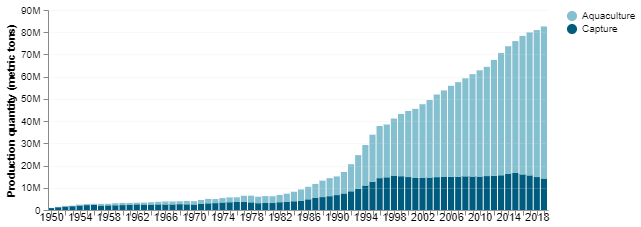

In [15]:
vega_view=dict(spec)
vega_view['height'] = widget_height
vega_view['width'] = widget_width
vega_view['legends'][0]['labelFont'] = 'Arial'
vega_view['legends'][0]['titleFont'] = 'Arial'
vega_view['data'][0]['url']= vega_view['data'][0]['url'].replace('{{geostore_env}}','geostore_prod')
vega_view['data'][0]['url'] = vega_view['data'][0]['url'].replace('{{geostore_id}}','f4599aaeedacb9e6ddca177a93795e4c')
Vega(vega_view)

[Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAETJBBpRtETEigBrOLN1JF22Lcza4ADyQIcAGziVpIAO40svRoAgAMYTLwNGRYaABMETI4SLKyNOJkoTKySKZoANqg4u5waCA4imyyDFBqEn4Mip7lWLj4RP7KALSK-pRQjmwDbAgESDg0JPGcAI6eAPyzALwAygCiADLrAMIAKtq0sgD6kdrEtjRITN5S2rmYcHcXngxw2gBiAEoA8gCy2jY-mOgVkZDgmGOj0UykwbEUAE9tAB1AAS6y+620oPBTmW2gA5AAzGgQeCI7SVaq1eriAnaTQAOQAIocgqdtPiCQBJZmM+lM1kXZTXbzaACEXIA4p42HpPAAFKo1OrqY6zBhIcRqTAI+k-L7MjHaABCAE17nl3ppVjtnpdRe8jba-ET4chMGhQLqcGV0KIGskqr7FLrylV-BAQABfGSYRRaiBuxQIQrehG+8omMzmV00OCeWTlF5vPxkKoMHBMBGFEBHU5+B5lAC6sfTmfQyYQDE8KBkrkqWa8dAAFA8GAhKMKrjcnoTjgSAJQFMLNvz6YsO2cx1vNmTQJDeKOoIogEoIP0gFx+H2XvTiIsyBOZS+gkI5UZIDJeuR5FDoKkVVpPMCyLdAmxjNsz1KcoazjDNL08DI4FsPxn3BVo4BiOIZHEQw-XjN4ZAALzgKo0EIp45E-b9UFAB5-wqZUaXUEDC1ggBGSCpGKGD0CgNhZUUG8EPKeF0hKFony1DCTxAABiCIBCgAB2MoZHkgAOAAWKAwlkMIQD3ajkFo+i-3KQCWMDEASVAzcRW3aNo2MpAXAUNMQHhfNtXKJg2GwUY-APbxymvEiMnka9UA4mReyYAsPgkT0tBFKSQHixLktWGhSLQDjYoy64Cx+UhmgmCjFCIoqEs8E19ALZDygQIJZFCuNDHMHK8tQAQoO8uBfPQbwiU9fdBlC9A4JAYjItcfKOswSaQCValVQkbQNS1HUkRHOFxAgRcbzobwkqGkBNDS46lrgM7MFWXVlvEd1Dz8TLPDu8pLqudL3vqiBGvES8WrSdqaoLTQkLIDQQGUWIxvBxVUgkrJUAAZhkcsgkq6qsdkH4UigOga1QMJKHiftxAE+Qf3e49QErCC6JAR4XBS0ADGh17OxezAxzyCcp0PIjCQAPwgJdIOclyZGQRRzGPU9b3DOA6ldKpU2ZhjLOY9bJFjEBBupv1QEG6Ef2ijmJsvcLbPzdjwKtGMZDfGAfxCm2-HvMDCrYIkiQBlLug4g2Satw9L2muyHZABFDND+J3et2C2LA2OuINklPBaZmPfKAShNThyZ1Cg24UEtQcHdmJJPKYACTNFDFAJVBLUwQWmzuAlVqA9RtFvFu28F6dHS7nvrPETbNW1YnB67PJ+fbycSznAkpEoARm8XbQAGpCX7iQJejbiQEZp3mazzwCbMYmfxX-LnKiNgyp-S-r6JsNmfv0nKBU6WZYyuQQashFagEvvnQS8I-ADXOnDOILloxAA)

# Indicator

Inputs
- production: Total Production (Aquaculture + Capture production) live weight in tonnes for the year 2019 [foo_062]
- population: Population for the year 2020 [soc_076]

Outputs
- live weight in kg per person 

## Rank

```sql
SELECT CONCAT(rank, ' of ', max_rank) FROM (SELECT *, MAX(rank) OVER (PARTITION BY true) AS max_rank FROM (SELECT *, RANK() OVER(ORDER BY value DESC) FROM (SELECT iso3_code, SUM(value)/pop*1000 as value 
FROM foo_062_rw0_fishery_production_edit production 
LEFT JOIN 
    (SELECT yr_data AS pop, country_code FROM soc_076_country_population_edit WHERE year = 2020) population 
    ON production.iso3_code = population.country_code
WHERE measure = 'Q_tlw' AND type = 'GlobalProduction_quantity' AND production.year=2019 
GROUP BY iso3_code, pop) data 
LEFT JOIN gadm36_0 gadm on gadm.gid_0 = data.iso3_code
WHERE value is not null and coastal = true) ranked ) max_rank
WHERE {{geostore_env}} ILIKE '{{geostore_id}}'
```

query: [`https://wri-rw.carto.com/api/v2/sql?q=SELECT CONCAT(rank, ' of ', max_rank) FROM (SELECT *, MAX(rank) OVER (PARTITION BY true) AS max_rank FROM (SELECT *, RANK() OVER(ORDER BY value DESC) FROM (SELECT iso3_code, SUM(value)/pop*1000 as value FROM foo_062_rw0_fishery_production_edit production LEFT JOIN (SELECT yr_data AS pop, country_code FROM soc_076_country_population_edit WHERE year = 2020) population ON production.iso3_code = population.country_code WHERE measure = 'Q_tlw' AND type = 'GlobalProduction_quantity' AND production.year=2019 GROUP BY iso3_code, pop) data LEFT JOIN gadm36_0 gadm on gadm.gid_0 = data.iso3_code WHERE value is not null and coastal = true) ranked ) max_rank WHERE {{geostore_env}} ILIKE '{{geostore_id}}'`](https://wri-rw.carto.com/api/v2/sql?q=SELECT%20CONCAT(rank,%20%27%20of%20%27,%20max_rank)%20FROM%20(SELECT%20*,%20MAX(rank)%20OVER%20(PARTITION%20BY%20true)%20AS%20max_rank%20FROM%20(SELECT%20*,%20RANK()%20OVER(ORDER%20BY%20value%20DESC)%20FROM%20(SELECT%20iso3_code,%20SUM(value)/pop*1000%20as%20value%20FROM%20foo_062_rw0_fishery_production_edit%20production%20LEFT%20JOIN%20(SELECT%20yr_data%20AS%20pop,%20country_code%20FROM%20soc_076_country_population_edit%20WHERE%20year%20=%202020)%20population%20ON%20production.iso3_code%20=%20population.country_code%20WHERE%20measure%20=%20%27Q_tlw%27%20AND%20type%20=%20%27GlobalProduction_quantity%27%20AND%20production.year=2019%20GROUP%20BY%20iso3_code,%20pop)%20data%20LEFT%20JOIN%20gadm36_0%20gadm%20on%20gadm.gid_0%20=%20data.iso3_code%20WHERE%20value%20is%20not%20null%20and%20coastal%20=%20true)%20ranked%20)%20max_rank%20WHERE%20geostore_prod%20ILIKE%20%27f4599aaeedacb9e6ddca177a93795e4c%27)

## Value

Annual kg / the years population as kg of fish/person

```sql
SELECT SUM(value)/pop*1000 as value 
FROM foo_062_rw0_fishery_production_edit production 
LEFT JOIN 
    (SELECT yr_data AS pop, country_code FROM soc_076_country_population_edit WHERE year = 2020) population 
    ON production.iso3_code = population.country_code
LEFT JOIN 
    gadm36_0 gadm on gadm.gid_0 = production.iso3_code 
WHERE measure = 'Q_tlw' AND type = 'GlobalProduction_quantity' AND production.year=2019 
AND gadm.{{geostoe_env}} ILIKE '{{geostore_id}}' 
GROUP BY gadm.gid_0, pop
```

query: [`https://wri-rw.carto.com/api/v2/sql?q=SELECT SUM(value)/pop*1000 as value FROM foo_062_rw0_fishery_production_edit production LEFT JOIN (SELECT yr_data AS pop, country_code FROM soc_076_country_population_edit WHERE year = 2020) population ON production.iso3_code = population.country_code LEFT JOIN gadm36_0 gadm on gadm.gid_0 = production.iso3_code WHERE measure = 'Q_tlw' AND type ='GlobalProduction_quantity' AND production.year=2019 AND gadm.{{geostoe_env}} ILIKE '{{geostore_id}}' GROUP BY gadm.gid_0, pop`](https://wri-rw.carto.com/api/v2/sql?q=SELECT%20SUM(value)/pop*1000%20as%20value%20FROM%20foo_062_rw0_fishery_production_edit%20production%20LEFT%20JOIN%20(SELECT%20yr_data%20AS%20pop,%20country_code%20FROM%20soc_076_country_population_edit%20WHERE%20year%20=%202020)%20population%20ON%20production.iso3_code%20=%20population.country_code%20LEFT%20JOIN%20gadm36_0%20gadm%20on%20gadm.gid_0%20=%20production.iso3_code%20WHERE%20measure%20=%20%27Q_tlw%27%20AND%20type%20=%27GlobalProduction_quantity%27%20AND%20production.year=2019%20AND%20gadm.gid_0%20ILIKE%20%27MEX%27%20GROUP%20BY%20gadm.gid_0,%20pop)


## RW Backoffice

- [back office](https://resourcewatch.org/admin/data/widgets/bf6604e1-9f6b-4988-ace0-80db05248a9a/edit?dataset=ac9c2f07-9f23-4a33-9958-e02c571ec009)
- parent dataset [foo.062](https://resourcewatch.org/data/explore/ac9c2f07-9f23-4a33-9958-e02c571ec009) (unpublished)
- dataset id ```ac9c2f07-9f23-4a33-9958-e02c571ec009```
- widget id: ```bf6604e1-9f6b-4988-ace0-80db05248a9a```